In [ ]:
print('hello')

hello


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d azalhowaide/iot-dataset-for-intrusion-detection-systems-ids

Dataset URL: https://www.kaggle.com/datasets/azalhowaide/iot-dataset-for-intrusion-detection-systems-ids
License(s): unknown
100% 524M/525M [00:10<00:00, 80.4MB/s]
100% 525M/525M [00:10<00:00, 52.3MB/s]


In [ ]:
!unzip '/content/iot-dataset-for-intrusion-detection-systems-ids.zip'

Archive:  /content/iot-dataset-for-intrusion-detection-systems-ids.zip
  inflating: BoTNeTIoT-L01-v2.csv    
  inflating: BotNeTIoT-L01_label_NoDuplicates.csv  


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import sklearn
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score , f1_score , precision_score , confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/BotNeTIoT-L01_label_NoDuplicates.csv')

In [ ]:
df.shape

(2426574, 25)

In [ ]:
df.describe()

,Unnamed: 0,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,...,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,label
count,2.426574e+06,2.426574e+06,2.426574e+06,2.426574e+06,2.426574e+06,2.426574e+06,2.426574e+06,2.426574e+06,2.426574e+06,2.426574e+06,...,2.426574e+06,2.426574e+06,2.426574e+06,2.426574e+06,2.426574e+06,2.426574e+06,2.426574e+06,2.426574e+06,2.426574e+06,2.426574e+06
mean,2.697342e+06,3.610199e+03,2.176135e+02,2.644564e+04,3.610199e+03,2.176138e+02,2.644569e+04,1.676056e+03,2.170561e+02,9.479734e+00,...,5.554230e+08,4.170853e+15,1.627457e+02,2.170255e+02,5.033178e+00,2.276344e+02,2.282595e+03,2.291038e+02,4.051784e-03,2.116140e-01
std,2.438426e+06,2.699672e+03,1.552091e+02,2.826344e+04,2.699672e+03,1.552092e+02,2.826340e+04,2.195495e+03,2.218185e+02,3.522442e+01,...,7.242537e+08,4.445099e+16,6.914904e+02,2.223230e+02,3.215324e+01,2.237813e+02,2.279659e+04,3.097686e+03,7.820544e-02,4.084527e-01
min,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,...,2.484468e-03,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,6.000000e+01,0.000000e+00,-1.312975e+05,-1.586467e+00,0.000000e+00
25%,6.701352e+05,2.353273e+01,6.939999e+01,4.293744e+01,2.353273e+01,6.939999e+01,4.293948e+01,1.000000e+00,6.000000e+01,0.000000e+00,...,2.574434e+00,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.579600e+06,3.865927e+03,1.349122e+02,1.116808e+04,3.865927e+03,1.349122e+02,1.116905e+04,3.503137e+00,7.399769e+01,1.675691e-01,...,8.186898e+02,1.604401e+01,1.000000e+00,7.400000e+01,0.000000e+00,7.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.744352e+06,6.339465e+03,3.821550e+02,5.520453e+04,6.339465e+03,3.821550e+02,5.520453e+04,4.128297e+03,5.538333e+02,6.785243e+00,...,1.507653e+09,2.382293e+09,1.049115e+00,5.540000e+02,0.000000e+00,5.540000e+02,4.550000e-13,0.000000e+00,0.000000e+00,0.000000e+00
max,7.062075e+06,8.946997e+03,1.401994e+03,4.520011e+05,8.946997e+03,1.401994e+03,4.520011e+05,7.944987e+03,1.470000e+03,6.784580e+02,...,1.534253e+09,5.880000e+17,4.594455e+03,1.470000e+03,6.863705e+02,1.470000e+03,5.014297e+05,1.406094e+05,2.760701e+00,1.000000e+00


In [ ]:
df.head()

,Unnamed: 0,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,...,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,label
0,0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.00000,98.0,0.000000e+00,...,1.505914e+09,0.000000e+00,1.00000,98.0,0.000000,98.000000,0.000000e+00,0.0,0.0,0
1,1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.93164,98.0,1.348699e-06,...,7.263102e+08,5.662344e+17,1.93164,98.0,0.000001,138.592929,1.818989e-12,0.0,0.0,0
2,2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.00000,66.0,0.000000e+00,...,1.505914e+09,0.000000e+00,1.00000,66.0,0.000000,114.856432,0.000000e+00,0.0,0.0,0
3,3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.00000,74.0,0.000000e+00,...,1.505914e+09,0.000000e+00,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,0
4,4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.00000,74.0,9.536743e-07,...,7.529571e+08,5.669445e+17,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2426574 entries, 0 to 2426573
Data columns (total 25 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   MI_dir_L0.1_weight    float64
 2   MI_dir_L0.1_mean      float64
 3   MI_dir_L0.1_variance  float64
 4   H_L0.1_weight         float64
 5   H_L0.1_mean           float64
 6   H_L0.1_variance       float64
 7   HH_L0.1_weight        float64
 8   HH_L0.1_mean          float64
 9   HH_L0.1_std           float64
 10  HH_L0.1_magnitude     float64
 11  HH_L0.1_radius        float64
 12  HH_L0.1_covariance    float64
 13  HH_L0.1_pcc           float64
 14  HH_jit_L0.1_weight    float64
 15  HH_jit_L0.1_mean      float64
 16  HH_jit_L0.1_variance  float64
 17  HpHp_L0.1_weight      float64
 18  HpHp_L0.1_mean        float64
 19  HpHp_L0.1_std         float64
 20  HpHp_L0.1_magnitude   float64
 21  HpHp_L0.1_radius      float64
 22  HpHp_L0.1_covariance  float64
 23  HpHp_L0

In [ ]:
df.isna().sum()

Unnamed: 0              0
MI_dir_L0.1_weight      0
MI_dir_L0.1_mean        0
MI_dir_L0.1_variance    0
H_L0.1_weight           0
H_L0.1_mean             0
H_L0.1_variance         0
HH_L0.1_weight          0
HH_L0.1_mean            0
HH_L0.1_std             0
HH_L0.1_magnitude       0
HH_L0.1_radius          0
HH_L0.1_covariance      0
HH_L0.1_pcc             0
HH_jit_L0.1_weight      0
HH_jit_L0.1_mean        0
HH_jit_L0.1_variance    0
HpHp_L0.1_weight        0
HpHp_L0.1_mean          0
HpHp_L0.1_std           0
HpHp_L0.1_magnitude     0
HpHp_L0.1_radius        0
HpHp_L0.1_covariance    0
HpHp_L0.1_pcc           0
label                   0
dtype: int64

In [ ]:
df = df.drop('Unnamed: 0' , axis=1)

-------------MI_dir_L0.1_weight-----------------


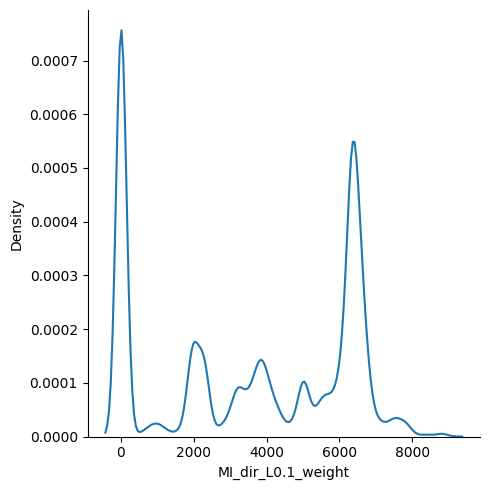

-------------MI_dir_L0.1_mean-----------------


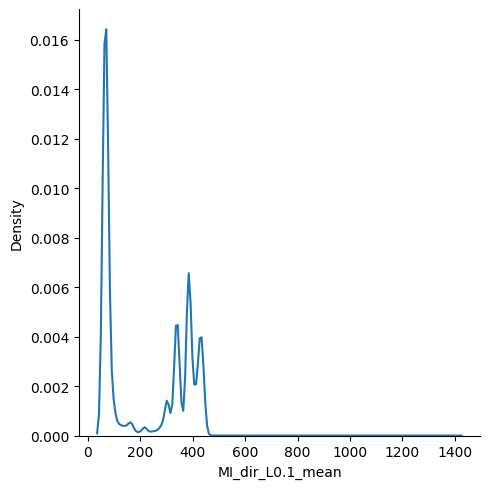

-------------MI_dir_L0.1_variance-----------------


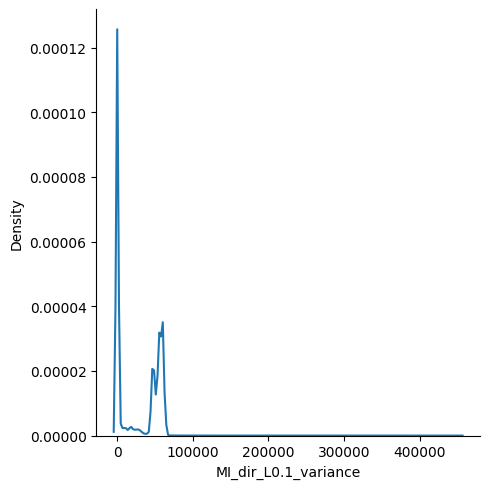

-------------H_L0.1_weight-----------------


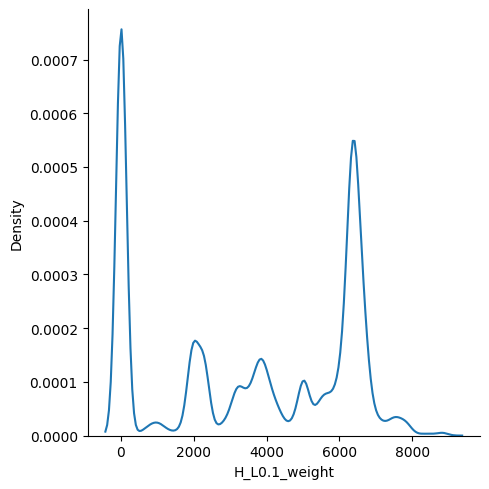

-------------H_L0.1_mean-----------------


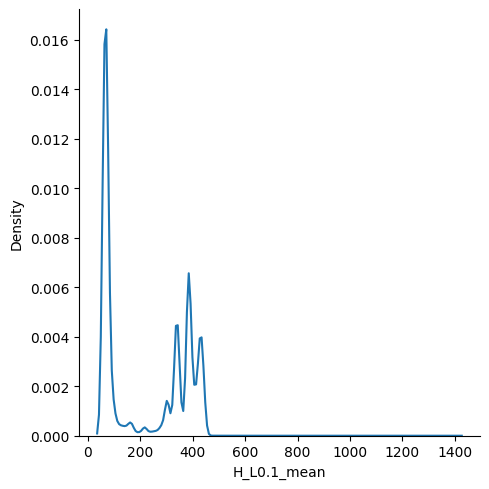

-------------H_L0.1_variance-----------------


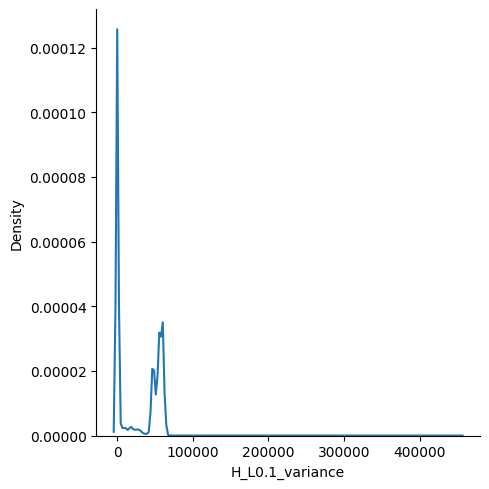

-------------HH_L0.1_weight-----------------


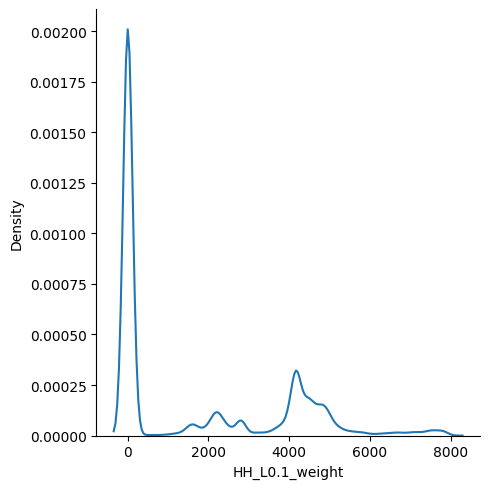

-------------HH_L0.1_mean-----------------


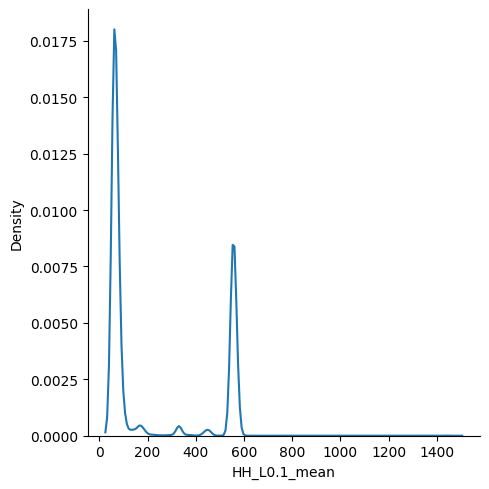

-------------HH_L0.1_std-----------------


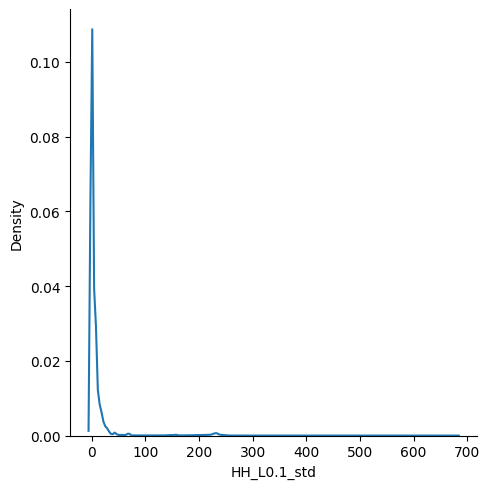

-------------HH_L0.1_magnitude-----------------


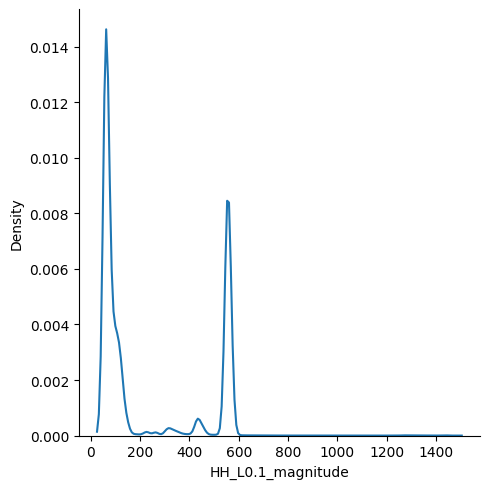

-------------HH_L0.1_radius-----------------


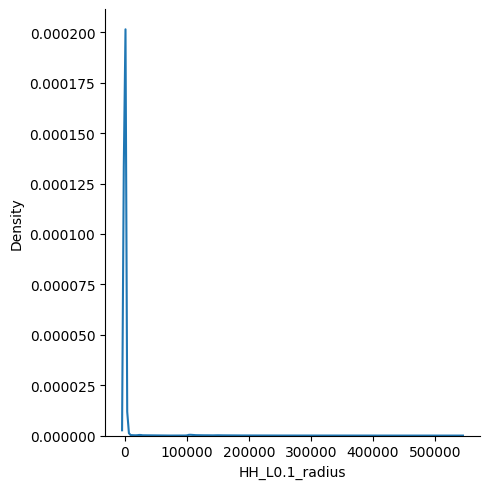

-------------HH_L0.1_covariance-----------------


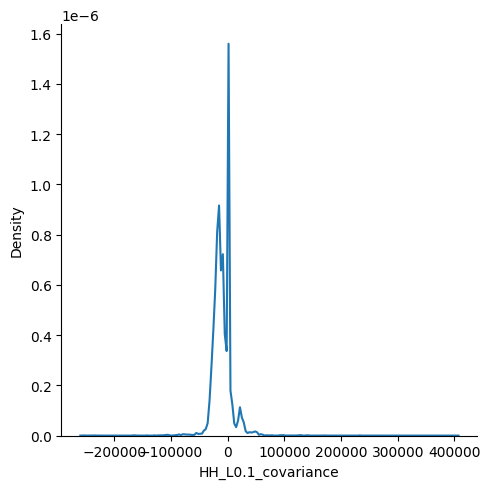

-------------HH_L0.1_pcc-----------------


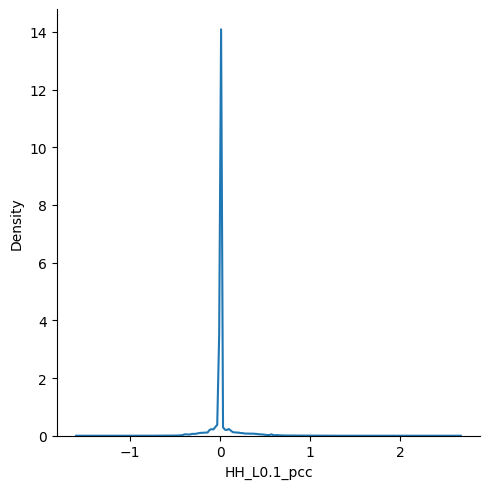

-------------HH_jit_L0.1_weight-----------------


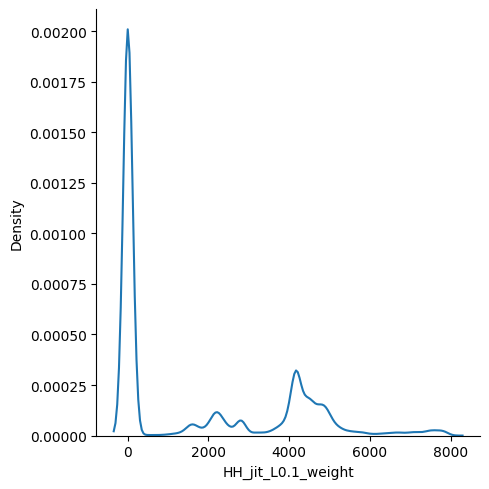

-------------HH_jit_L0.1_mean-----------------


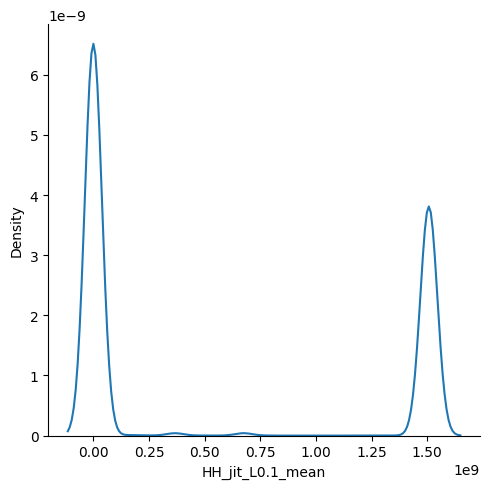

-------------HH_jit_L0.1_variance-----------------


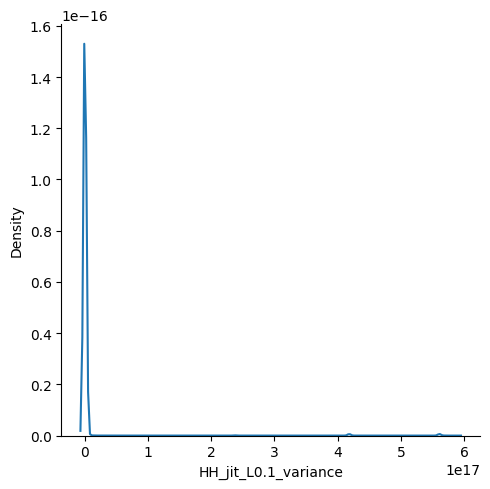

-------------HpHp_L0.1_weight-----------------


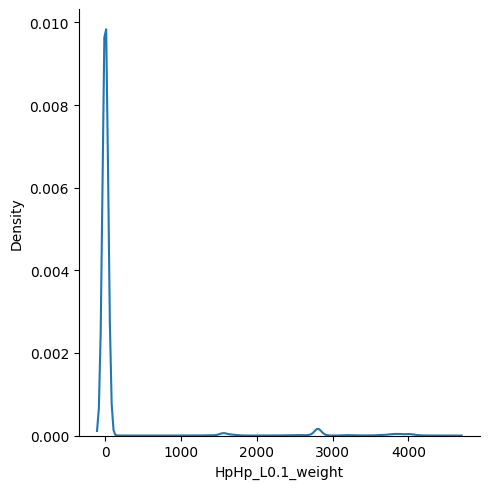

-------------HpHp_L0.1_mean-----------------


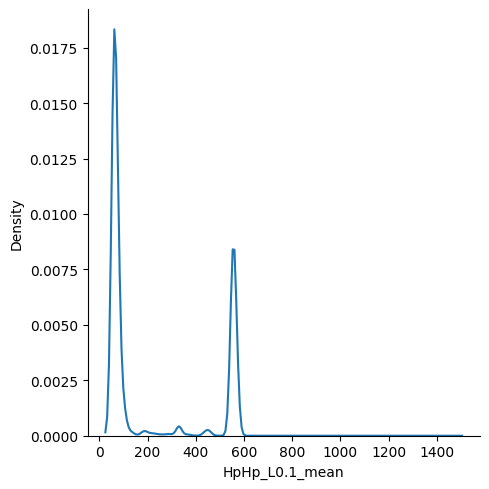

-------------HpHp_L0.1_std-----------------


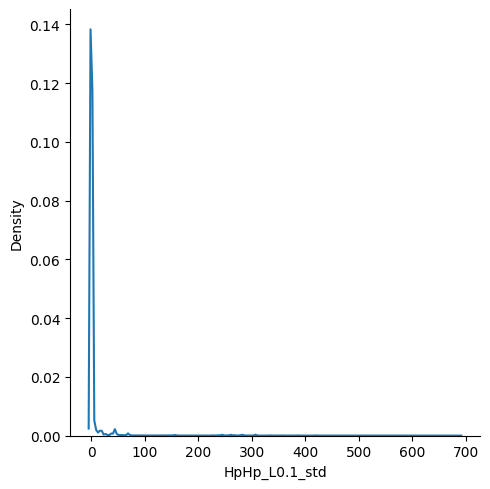

-------------HpHp_L0.1_magnitude-----------------


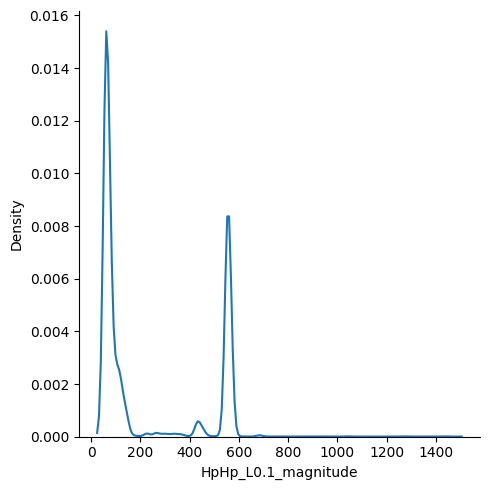

-------------HpHp_L0.1_radius-----------------


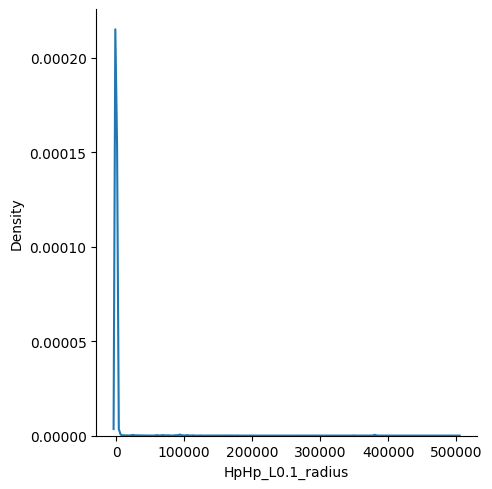

-------------HpHp_L0.1_covariance-----------------


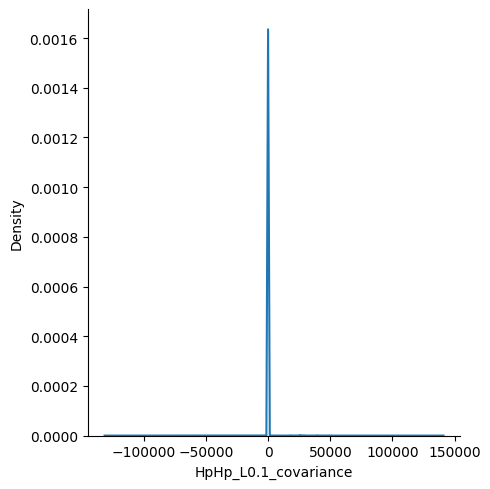

-------------HpHp_L0.1_pcc-----------------


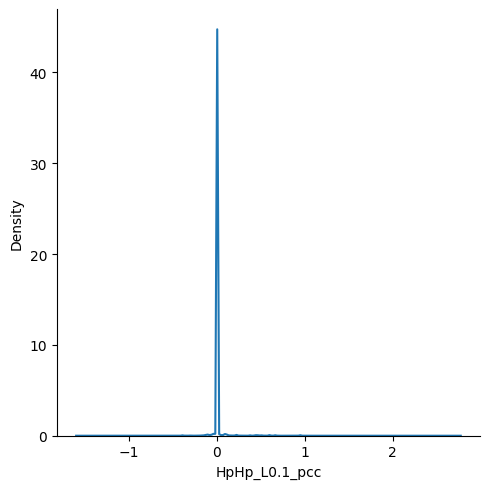

In [ ]:
for i in df.keys():
  if i != 'label':
    print(f'-------------{i}-----------------')
    sns.displot(df , x=i , kind='kde')
    plt.show()

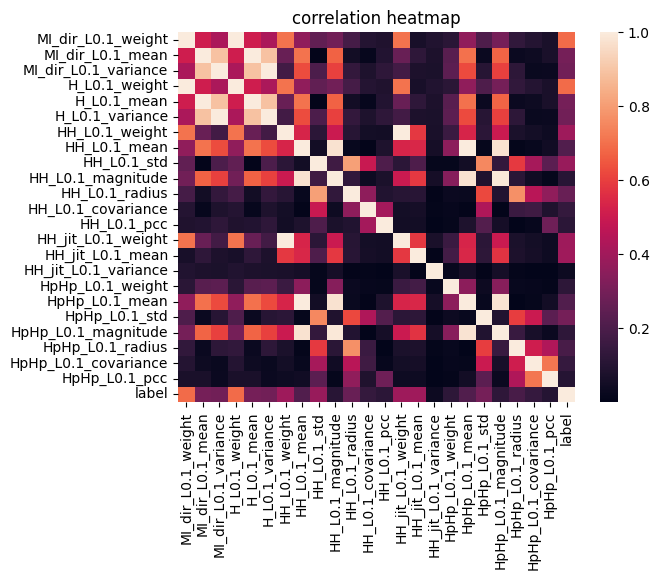

In [ ]:
sns.heatmap(abs(df.corr()))
plt.title('correlation heatmap')
plt.show()

In [ ]:
def mini_batch(df):
  batch_size = 120000
  batch_indices = np.random.choice(df.index, batch_size, replace=False)
  df_new = df.loc[batch_indices]
  x,y = df_new.iloc[: , :-1].values , df_new.iloc[: , -1:].values
  xtrain , xtest , ytrain , ytest = train_test_split(x,y , test_size=0.2)
  scl = StandardScaler()
  xtrain = scl.fit_transform(xtrain);
  xtest = scl.transform(xtest)
  return xtrain , xtest , ytrain , ytest

In [ ]:
xtrain , xtest , ytrain , ytest = mini_batch(df)

arr = [];
for max_depth in range(1,51):
        model = DecisionTreeClassifier(max_depth=max_depth)
        model.fit(xtrain, ytrain)
        ypred = model.predict(xtest)
        accuracy = accuracy_score(ytest, ypred)
        arr.append(accuracy);

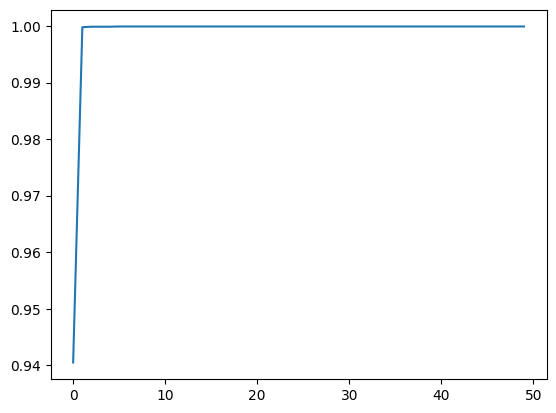

In [ ]:
plt.plot(np.array(arr))

In [ ]:
population_size,generation = 28,5

population = np.random.randint(2, size=(population_size , xtrain.shape[1]))

In [ ]:
def fitness(population):
  fitness_value = [];
  for i in population:
    xtrain , xtest , ytrain , ytest = mini_batch(df)
    train_selected = xtrain[: , i==1]
    test_selected = xtest[: , i == 1]
    if(train_selected.shape[1] == 0):
      accuracy = 0;
      fitness_value.append([accuracy , i])
      continue;
    model = DecisionTreeClassifier(max_depth=10)
    model.fit(train_selected, ytrain)
    y_pred = model.predict(test_selected)
    accuracy = accuracy_score(ytest, y_pred)
    fitness_value.append([accuracy , i])

  return fitness_value;

def selection(fitness_value):
  fitness_value = sorted(fitness_value , key=lambda ac : fitness_value[0] , reverse=True);
  selected_fitness = fitness_value[:population_size//2];
  return np.array([i[1] for i in selected_fitness])


def crossover(parent1 , parent2):         #uniform crossover
  offspring1 = []
  offspring2 = []
  for i in range(len(parent1)):
      if random.random() < 0.5:
          offspring1.append(parent1[i])
          offspring2.append(parent2[i])
      else:
          offspring1.append(parent2[i])
          offspring2.append(parent1[i])
  return  offspring1 , offspring2

def mutation(child):
  mt = 0.01;
  for i in range(len(child)):
    if random.random() < mt:
      child[i] = 1-child[i]
  return child;



In [ ]:
## genetic algorithm

for gen in range(generation):
  new_population = [];
  fitness_value = fitness(population);
  selective_cr = selection(fitness_value);
  cross = [j for j in range(population_size//2)]
  random.shuffle(cross);
  for i in range(len(cross)//2):
    child1 , child2 = crossover(selective_cr[cross[i]] , selective_cr[len(cross)-(i+1)])
    new_population.append(np.array(mutation(child1)))
    new_population.append(np.array(mutation(child2)))
  population = np.concatenate((selective_cr , np.array(new_population)))
  print("generation :" , gen+1)

f_score = fitness(population)
best_cromosome = sorted(f_score , key=lambda ac : f_score[0] , reverse=True)[0]

print('accuracy of best cromosome :' , best_cromosome[0])
print('used feature :' , best_cromosome[1])

generation : 1
generation : 2
generation : 3
generation : 4
generation : 5
accuracy of best cromosome : 0.9996666666666667
used feature : [0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1]


In [ ]:
class DynamicFeatureSelector:
    def __init__(self, n_features, alpha=0.1, gamma=0.9, epsilon=0.2):
        self.n_features = n_features
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = {}


    def explore_exploit(self, state):
        if random.random() < self.epsilon:
            action = random.randint(0, self.n_features - 1)
        else:
            tup_state = tuple(state)
            if tup_state not in self.q_table or not self.q_table[tup_state]:
                action = random.randint(0, self.n_features - 1)
            else:
                action = max(self.q_table[tup_state], key=self.q_table[tup_state].get)
        return action

    def update(self, state, action, reward, next_state):
        tup_state = tuple(state)
        tup_next = tuple(next_state)

        if tup_state not in self.q_table:
            self.q_table[tup_state] = {}

        if action not in self.q_table[tup_state]:
            self.q_table[tup_state][action] = 0

        next_max = max(self.q_table.get(tup_next, {}).values(), default=0)

        self.q_table[tup_state][action] = (1 - self.alpha) * self.q_table[tup_state][action] + self.alpha * (reward + self.gamma * next_max)

    def train(self, xtrain, xtest, ytrain, ytest, n_episodes=5):
        for episode in range(n_episodes):
          print('\nstarting episode:' , episode+1)
          state = [0] * self.n_features
          state[random.randint(0, self.n_features - 1)] = 1  # Ensure initial state has at least one feature selected

          done = False
          cnt = 0
          while not done:
            action = self.explore_exploit(state)
            next_state = state.copy()
            next_state[action] = 1 - next_state[action]
            if sum(next_state) == 0:
                next_state[action] = 1

            train_selected= xtrain[:, np.array(next_state) == 1]
            test_selected = xtest[:, np.array(next_state) == 1]

            classifier = DecisionTreeClassifier(max_depth=8)
            classifier.fit(train_selected, ytrain)
            ypred = classifier.predict(test_selected)
            reward = accuracy_score(ytest, ypred)

            self.update(state, action, reward, next_state)
            state = next_state
            cnt +=1;
            print(f"\rsteps : {cnt}", end="", flush=True)



            if (sum(state) == self.n_features) or (cnt > 300) :            # End episode if all features are selected(but I added extra conditation to fast termination)
              done = True

        return state

In [ ]:
xtrain , xtest , ytrain , ytest = mini_batch(df)

model = DynamicFeatureSelector(n_features=xtrain.shape[1])
optimal_features = model.train(xtrain, xtest, ytrain, ytest)

print("\nSelected featurs:" , optimal_features)


starting episode: 1
steps : 301
starting episode: 2
steps : 301
starting episode: 3
steps : 301
starting episode: 4
steps : 301
starting episode: 5
steps : 301Selected featurs: [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]


In [ ]:
train_selected = xtrain[: , np.array(optimal_features) == 1]
test_selected = xtest[: , np.array(optimal_features) == 1]

In [ ]:
model = DecisionTreeClassifier(max_depth=12)
model.fit(train_selected , ytrain)
ypred = model.predict(test_selected)
accuracy_score(ytest , ypred)

0.9995

In [ ]:
def scores(optimal_features):
  x,y = df.iloc[: , :-1].values , df.iloc[: , -1:].values
  xtrain , xtest , ytrain , ytest = train_test_split(x,y , test_size=0.2)
  scl = StandardScaler()
  xtrain = scl.fit_transform(xtrain);
  xtest = scl.transform(xtest)
  train_selected = xtrain[: , np.array(optimal_features) == 1]
  test_selected = xtest[: , np.array(optimal_features) == 1]
  model = DecisionTreeClassifier(max_depth=12)
  model.fit(train_selected , ytrain)
  ypred = model.predict(test_selected)
  accuracy = accuracy_score(ytest, ypred)
  precision = precision_score(ytest, ypred)
  f1 = f1_score(ytest, ypred)
  print(f"Accuracy: {accuracy}")
  print(f"Precision: {precision}")
  print(f"F1 Score: {f1}")
  scores = cross_val_score(model,train_selected,ytrain, cv=5)
  print(f"Cross-validation scores: {scores}")
  print(f"Cross-validation accuracy: {scores.mean()}")
  confusion = confusion_matrix(ytest, ypred)
  return confusion



--------------Using reenforcement Learning----------------
Accuracy: 0.9998330980909307
Precision: 0.9994460210706372
F1 Score: 0.9996063202608978
Cross-validation scores: [0.9998094  0.99983516 0.99984804 0.99986607 0.99981198]
Cross-validation accuracy: 0.9998341282527725


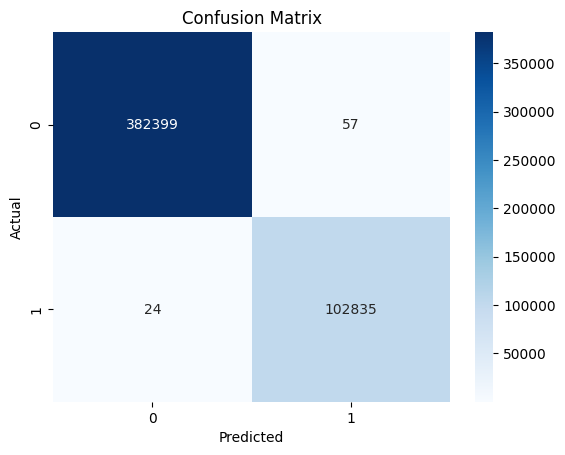

In [ ]:
print('--------------Using reenforcement Learning----------------')
confusion = scores(optimal_features)
sns.heatmap(confusion , annot=True , cmap='Blues' , fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

-------------Using Genetic Algorithm --------------------
Accuracy: 0.9999567291346857
Precision: 0.9998540089151889
F1 Score: 0.9998978017646228
Cross-validation scores: [0.99996394 0.99996394 0.99997167 0.99994849 0.99991758]
Cross-validation accuracy: 0.9999531231867855


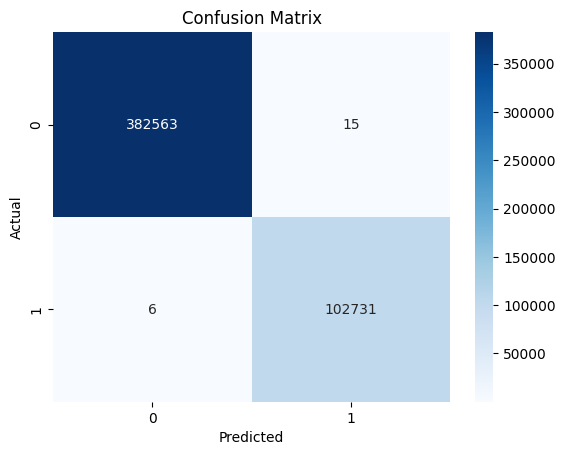

In [ ]:
print('-------------Using Genetic Algorithm --------------------')
confusion = scores(best_cromosome[1])
sns.heatmap(confusion , annot=True , cmap='Blues' , fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()